# Regression Group Project CO2 Emissions

<img src="https://images.propertycasualty360.com/contrib/content/uploads/sites/414/2022/04/Pollution-Solution-Image_0422-NU.jpg" alt="Pollution Solution" width="1000">


## Team Members
##### Khuthadzo Tshikovhele
##### Dembe Tsiwana
##### Keamogetswe Peterson
##### Aston Greeves

The following notebook demonstrates models that were built using the CO2 Emissions data where we will be predicting emmissions per area using the data provided.

## Loading of Resources

In [1]:
## Loading Packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

#### Packages

These packages collectively provide a powerful toolkit for handling, analyzing, and visualizing data.
1. Pandas Why we need it: Pandas is essential for data manipulation and analysis. It provides data structures like DataFrames which are perfect for handling tabular data. What it is used for: Reading Data: Load the CSV file into a DataFrame.
2. Data Cleaning: Handle missing values, filter data, and perform transformations. Data Analysis: Compute statistics and aggregate data. Data Visualization: Plot data directly from DataFrames.
3. NumPy Why we need it: NumPy is fundamental for numerical operations in Python. It provides support for arrays and matrices, along with a collection of mathematical functions to operate on these arrays. What it is used for: Array Operations: Perform element-wise operations on data. Mathematical Functions: Use built-in functions for complex mathematical operations. Data Conversion: Convert data types and structures for compatibility with other libraries.
4. Matplotlib/Seaborn Why we need it: These libraries are crucial for data visualization. They help in creating static, animated, and interactive visualizations in Python. What it is used for: Plotting: Create various types of plots like line charts, bar charts, histograms, etc. Customization: Customize the appearance of plots (titles, labels, colors). Statistical Visualization: Seaborn provides high-level interfaces for drawing attractive statistical graphics.
5. SciPy Why we need it: SciPy builds on NumPy and provides additional functionality for scientific and technical computing. What it is used for: Statistical Analysis: Perform statistical tests and computations. Optimization: Solve optimization problems. Signal Processing: Process and analyze signals.
6. Scikit-learn Why we need it: Scikit-learn is essential for machine learning. It provides simple and efficient tools for data mining and data analysis. What it is used for: Preprocessing: Scale and transform data. Modeling: Build and train machine learning models. Evaluation: Evaluate model performance using metrics.
7. Jupyter Notebook Why we need it: Jupyter Notebook is an interactive computing environment that enables users to create and share documents that contain live code, equations, visualizations, and narrative text. What it is used for: Interactive Coding: Write and execute code in an interactive environment. Documentation: Combine code with rich text elements like paragraphs, equations, and visualizations. Data Exploration: Explore data and visualize results in real-time.

## Data Collection and Description

In [2]:
data = pd.read_csv('co2_emissions_from_agri.csv')
data.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167,2593947,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490,2763167,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568,2985663,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090,3237009,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115,3482604,7733458.0,7722096.0,2500.768729,0.372250


In [3]:
# Display the first few rows of the dataframe
print("Initial data:")
print(data.head())

Initial data:
          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.8

This code displays the first few rows of a dataframe.

1. Load the Data: The code assumes that the dataset co2_emissions_from_agri 1.csv has already been loaded into a dataframe named data.

2. Print Initial Data:print("Initial data:"): This line prints the string "Initial data:" to the console. It's a simple way to label the output that follows. 
3. print(data.head()): This line prints the first few rows of the dataframe data. The head() method in pandas, by default, returns the first five rows of the dataframe. This is useful for quickly inspecting the structure and contents of the dataframe.

In [4]:
# Display the column names of the dataframe
print("\nColumn names in the dataframe:")
print(data.columns)


Column names in the dataframe:
Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')


This code snippet is designed to display the column names of a dataframe. 
Here's a detailed explanation of what it does:

1. Print Column Names Label:
print("\nColumn names in the dataframe:"): This line prints the string "Column names in the dataframe:" to the console. The \n at the beginning adds a newline for better readability. Print Column Names:
print(data.columns): This line prints the names of all the columns in the dataframe data. The columns attribute of a pandas dataframe returns an Index object containing the column names.This output shows the names of all the columns in the dataframe, giving you a quick overview of the structure of the dataset. This output shows the names of all the columns in the dataframe.

In [5]:
# Drop any rows with missing values
data_cleaned = data.dropna()

In [6]:
# Display the first few rows of the cleaned dataframe
print("\nData after dropping rows with missing values:")
print(data_cleaned.head())


Data after dropping rows with missing values:
       Area  Year  Savanna fires  Forest fires  Crop Residues  \
31  Albania  1990         5.5561        7.0253        59.2391   
32  Albania  1991         5.5561        7.0253        31.4625   
33  Albania  1992         5.5561        7.0253        29.9373   
34  Albania  1993         5.5561        7.0253        44.0550   
35  Albania  1994         5.5561        7.0253        42.4253   

    Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
31           23.5200                     110.5705                       2.0   
32            6.2720                     110.5705                       2.0   
33            1.8816                     110.5705                       2.0   
34            1.0976                     110.5705                       2.0   
35            0.0000                     110.5705                       3.0   

    Food Transport  Forestland  ...  Manure Management  \
31         46.9645     72.858

In [7]:
# Check if 'CO2_Emissions' is in the columns
if 'total_emission' in data_cleaned.columns:
    # Filter the data for a specific condition (e.g., CO2 emissions greater than a certain value)
    filtered_data = data_cleaned[data_cleaned['total_emission'] > 1000]
       
# Display the first few rows of the filtered dataframe
    print("\nFiltered data (total_emission > 1000):")
    print(filtered_data.head())

# Save the cleaned and filtered data to a new CSV file
    filtered_data.to_csv('cleaned_filtered_co2_emissions.csv', index=False)

    print("\nCleaned and filtered data saved to 'cleaned_filtered_co2_emissions.csv'")
else:
    print("\nColumn 'CO2_Emissions' not found in the dataframe. Please check the column names.")



Filtered data (total_emission > 1000):
       Area  Year  Savanna fires  Forest fires  Crop Residues  \
31  Albania  1990         5.5561        7.0253        59.2391   
32  Albania  1991         5.5561        7.0253        31.4625   
33  Albania  1992         5.5561        7.0253        29.9373   
34  Albania  1993         5.5561        7.0253        44.0550   
35  Albania  1994         5.5561        7.0253        42.4253   

    Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
31           23.5200                     110.5705                       2.0   
32            6.2720                     110.5705                       2.0   
33            1.8816                     110.5705                       2.0   
34            1.0976                     110.5705                       2.0   
35            0.0000                     110.5705                       3.0   

    Food Transport  Forestland  ...  Manure Management  \
31         46.9645     72.8581  ... 

This code snippet checks if the column 'total_emission' exists in the dataframe data_cleaned. If it does, it filters the dataframe to include only rows where 'total_emission' is greater than 1000, displays the first few rows of the filtered data, and saves this filtered data to a new CSV file named 'cleaned_filtered_co2_emissions.csv'. If the column is not found, it prints a message indicating that 'total_emission' is not in the dataframe and suggests checking the column names. This process ensures specific data is filtered and saved, providing clear feedback to the user.

**Handling Duplicate rows and removing them**

In [8]:
# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Display the first few rows of the dataframe after removing duplicates
print("\nData after removing duplicate rows:")
print(data_cleaned.head())


Data after removing duplicate rows:
       Area  Year  Savanna fires  Forest fires  Crop Residues  \
31  Albania  1990         5.5561        7.0253        59.2391   
32  Albania  1991         5.5561        7.0253        31.4625   
33  Albania  1992         5.5561        7.0253        29.9373   
34  Albania  1993         5.5561        7.0253        44.0550   
35  Albania  1994         5.5561        7.0253        42.4253   

    Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
31           23.5200                     110.5705                       2.0   
32            6.2720                     110.5705                       2.0   
33            1.8816                     110.5705                       2.0   
34            1.0976                     110.5705                       2.0   
35            0.0000                     110.5705                       3.0   

    Food Transport  Forestland  ...  Manure Management  \
31         46.9645     72.8581  ...    

In [36]:
# Convert data types if necessary (e.g., converting a column to numeric)
# Assuming 'Year' column exists and needs to be converted to integer
if 'Year' in data_cleaned.columns:
    data_cleaned['Year'] = pd.to_numeric(data_cleaned['Year'], errors='coerce')

In [37]:
# Display the data types of the dataframe
print("\nData types after conversion:")
print(data_cleaned.dtypes)


Data types after conversion:
area                                object
year                                 int64
savanna fires                      float64
forest fires                       float64
crop residues                      float64
rice cultivation                   float64
drained organic soils (co2)        float64
pesticides manufacturing           float64
food transport                     float64
forestland                         float64
net forest conversion              float64
food household consumption         float64
food retail                        float64
on-farm electricity use            float64
food packaging                     float64
agrifood systems waste disposal    float64
food processing                    float64
fertilizers manufacturing          float64
ippu                               float64
manure applied to soils            float64
manure left on pasture             float64
manure management                  float64
fires in organic soils  

In [38]:
# Rename columns for consistency (e.g., converting column names to lowercase)
data_cleaned.columns = [col.lower() for col in data_cleaned.columns]

# Display the column names after renaming
print("\nColumn names after renaming:")
print(data_cleaned.columns)


Column names after renaming:
Index(['area', 'year', 'savanna fires', 'forest fires', 'crop residues',
       'rice cultivation', 'drained organic soils (co2)',
       'pesticides manufacturing', 'food transport', 'forestland',
       'net forest conversion', 'food household consumption', 'food retail',
       'on-farm electricity use', 'food packaging',
       'agrifood systems waste disposal', 'food processing',
       'fertilizers manufacturing', 'ippu', 'manure applied to soils',
       'manure left on pasture', 'manure management', 'fires in organic soils',
       'fires in humid tropical forests', 'on-farm energy use',
       'rural population', 'urban population', 'total population - male',
       'total population - female', 'total_emission',
       'average temperature °c'],
      dtype='object')


In [39]:
# Save the cleaned data to a new CSV file
data_cleaned.to_csv('cleaned_co2_emissions.csv', index=False)

print("\nCleaned data saved to 'cleaned_co2_emissions.csv'")


Cleaned data saved to 'cleaned_co2_emissions.csv'


**Handling Outliers**

In [40]:
# Select only numeric columns for outlier removal
numeric_data = data.select_dtypes(include=['number'])

# Remove outliers using the IQR method
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
data_no_outliers = numeric_data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the first few rows of the dataframe after removing outliers
print("\nData after removing outliers:")
print(data_no_outliers.head())

# Save the cleaned data to a new CSV file
data_no_outliers.to_csv('data_no_outliers.csv', index=False)

print("\nData without outliers saved to 'data_no_outliers.csv'")


Data after removing outliers:
   year  savanna fires  forest fires  crop residues  rice cultivation  \
0  1990         5.5561        7.0253        59.2391           23.5200   
1  1991         5.5561        7.0253        31.4625            6.2720   
2  1992         5.5561        7.0253        29.9373            1.8816   
3  1993         5.5561        7.0253        44.0550            1.0976   
4  1994         5.5561        7.0253        42.4253            0.0000   

   drained organic soils (co2)  pesticides manufacturing  food transport  \
0                     110.5705                       2.0         46.9645   
1                     110.5705                       2.0         47.9519   
2                     110.5705                       2.0         40.5272   
3                     110.5705                       2.0         57.6592   
4                     110.5705                       3.0         72.4242   

   forestland  net forest conversion  ...  manure management  \
0     72.

This code snippet selects numeric columns from a dataframe, removes outliers using the Interquartile Range (IQR) method, displays the first few rows of the cleaned dataframe, and saves the cleaned data to a new CSV file. It first selects numeric columns with data.select_dtypes(include=['number']), calculates the IQR for each column, and filters out rows with values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]. It then prints the cleaned data and saves it to 'data_no_outliers.csv', confirming the save with a message.

**Inputing Missing Values**

In [41]:
# Fill missing values with the mean of the numeric columns
data_filled = data.fillna(data.mean(numeric_only=True))

# Display the first few rows of the dataframe after filling missing values
print("\nData after filling missing values with mean:")
print(data_filled.head())


Data after filling missing values with mean:
      area  year  savanna fires  forest fires  crop residues  \
0  Albania  1990         5.5561        7.0253        59.2391   
1  Albania  1991         5.5561        7.0253        31.4625   
2  Albania  1992         5.5561        7.0253        29.9373   
3  Albania  1993         5.5561        7.0253        44.0550   
4  Albania  1994         5.5561        7.0253        42.4253   

   rice cultivation  drained organic soils (co2)  pesticides manufacturing  \
0           23.5200                     110.5705                       2.0   
1            6.2720                     110.5705                       2.0   
2            1.8816                     110.5705                       2.0   
3            1.0976                     110.5705                       2.0   
4            0.0000                     110.5705                       3.0   

   food transport  forestland  ...  manure management  fires in organic soils  \
0         46.9645  

**Normalizing the data**

In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
 
# Sample data provided by the user
data_dict = {
    "Area": ["Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan"],
    "Year": [1990, 1991, 1992, 1993, 1994],
    "Savanna fires": [14.7237, 14.7237, 14.7237, 14.7237, 14.7237],
    "Forest fires": [0.0557, 0.0557, 0.0557, 0.0557, 0.0557],
    "Crop Residues": [205.6077, 209.4971, 196.5341, 230.8175, 242.0494],
    "Rice Cultivation": [686.00, 678.16, 686.00, 686.00, 705.60],
    "Drained organic soils (CO2)": [0.0, 0.0, 0.0, 0.0, 0.0],
    "Pesticides Manufacturing": [11.807483, 11.712073, 11.712073, 11.712073, 11.712073],
    "Food Transport": [63.1152, 61.2125, 53.3170, 54.3617, 53.9874],
    "Forestland": [-2388.803, -2388.803, -2388.803, -2388.803, -2388.803],
    "Manure Management": [319.1763, 342.3079, 349.1224, 352.2947, 367.6784],
    "Fires in organic soils": [0.0, 0.0, 0.0, 0.0, 0.0],
    "Fires in humid tropical forests": [0.0, 0.0, 0.0, 0.0, 0.0],
    "On-farm energy use": [None] * 5,
    "Rural population": [9655167, 10230490, 10995568, 11858090, 12690115],
    "Urban population": [2593947, 2763167, 2985663, 3237009, 3482604],
    "Total Population - Male": [5348387.0, 5372959.0, 6028494.0, 7003641.0, 7733458.0],
    "Total Population - Female": [5346409.0, 5372208.0, 6028939.0, 7000119.0, 7722096.0],
    "total_emission": [2198.963539, 2323.876629, 2356.304229, 2368.470529, 2500.768729],
    "Average Temperature °C": [0.536167, 0.020667, -0.259583, 0.101917, 0.372250]
}
 
# Create DataFrame
data = pd.DataFrame(data_dict)
 
# Display the initial data
print("Initial data:")
print(data.head())
 
# Fill missing values with the mean of the numeric columns
data_filled = data.fillna(data.mean(numeric_only=True))
 
# Normalize the numeric columns
numeric_columns = data_filled.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_filled[numeric_columns]), columns=numeric_columns)
 
# Combine the normalized numeric columns with the non-numeric columns
data_normalized = pd.concat([data_filled.select_dtypes(exclude=['float64', 'int64']).reset_index(drop=True), data_normalized], axis=1)
 
# Display the first few rows of the normalized dataframe
print("\nNormalized data:")
print(data_normalized.head())

Initial data:
          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803   

This code snippet performs data preprocessing tasks, including creating a dataframe, filling missing values, normalizing numeric columns, and displaying the processed data. It imports pandas and MinMaxScaler, creates a dataframe from a dictionary, fills missing values with the mean of numeric columns, normalizes numeric columns using MinMaxScaler, combines normalized numeric columns with non-numeric columns, and displays the first few rows of the normalized dataframe.

## Exploratory Data Analysis

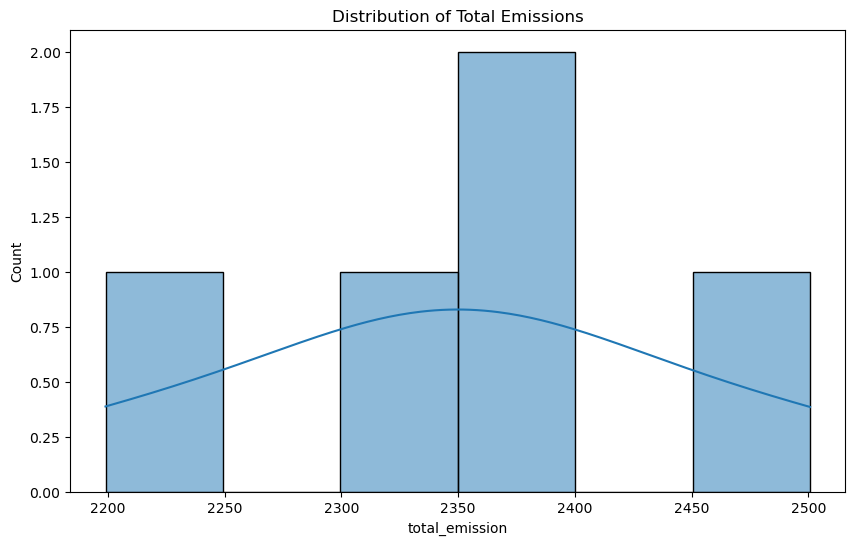

In [43]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['total_emission'], kde=True)
plt.title('Distribution of Total Emissions')
plt.show()

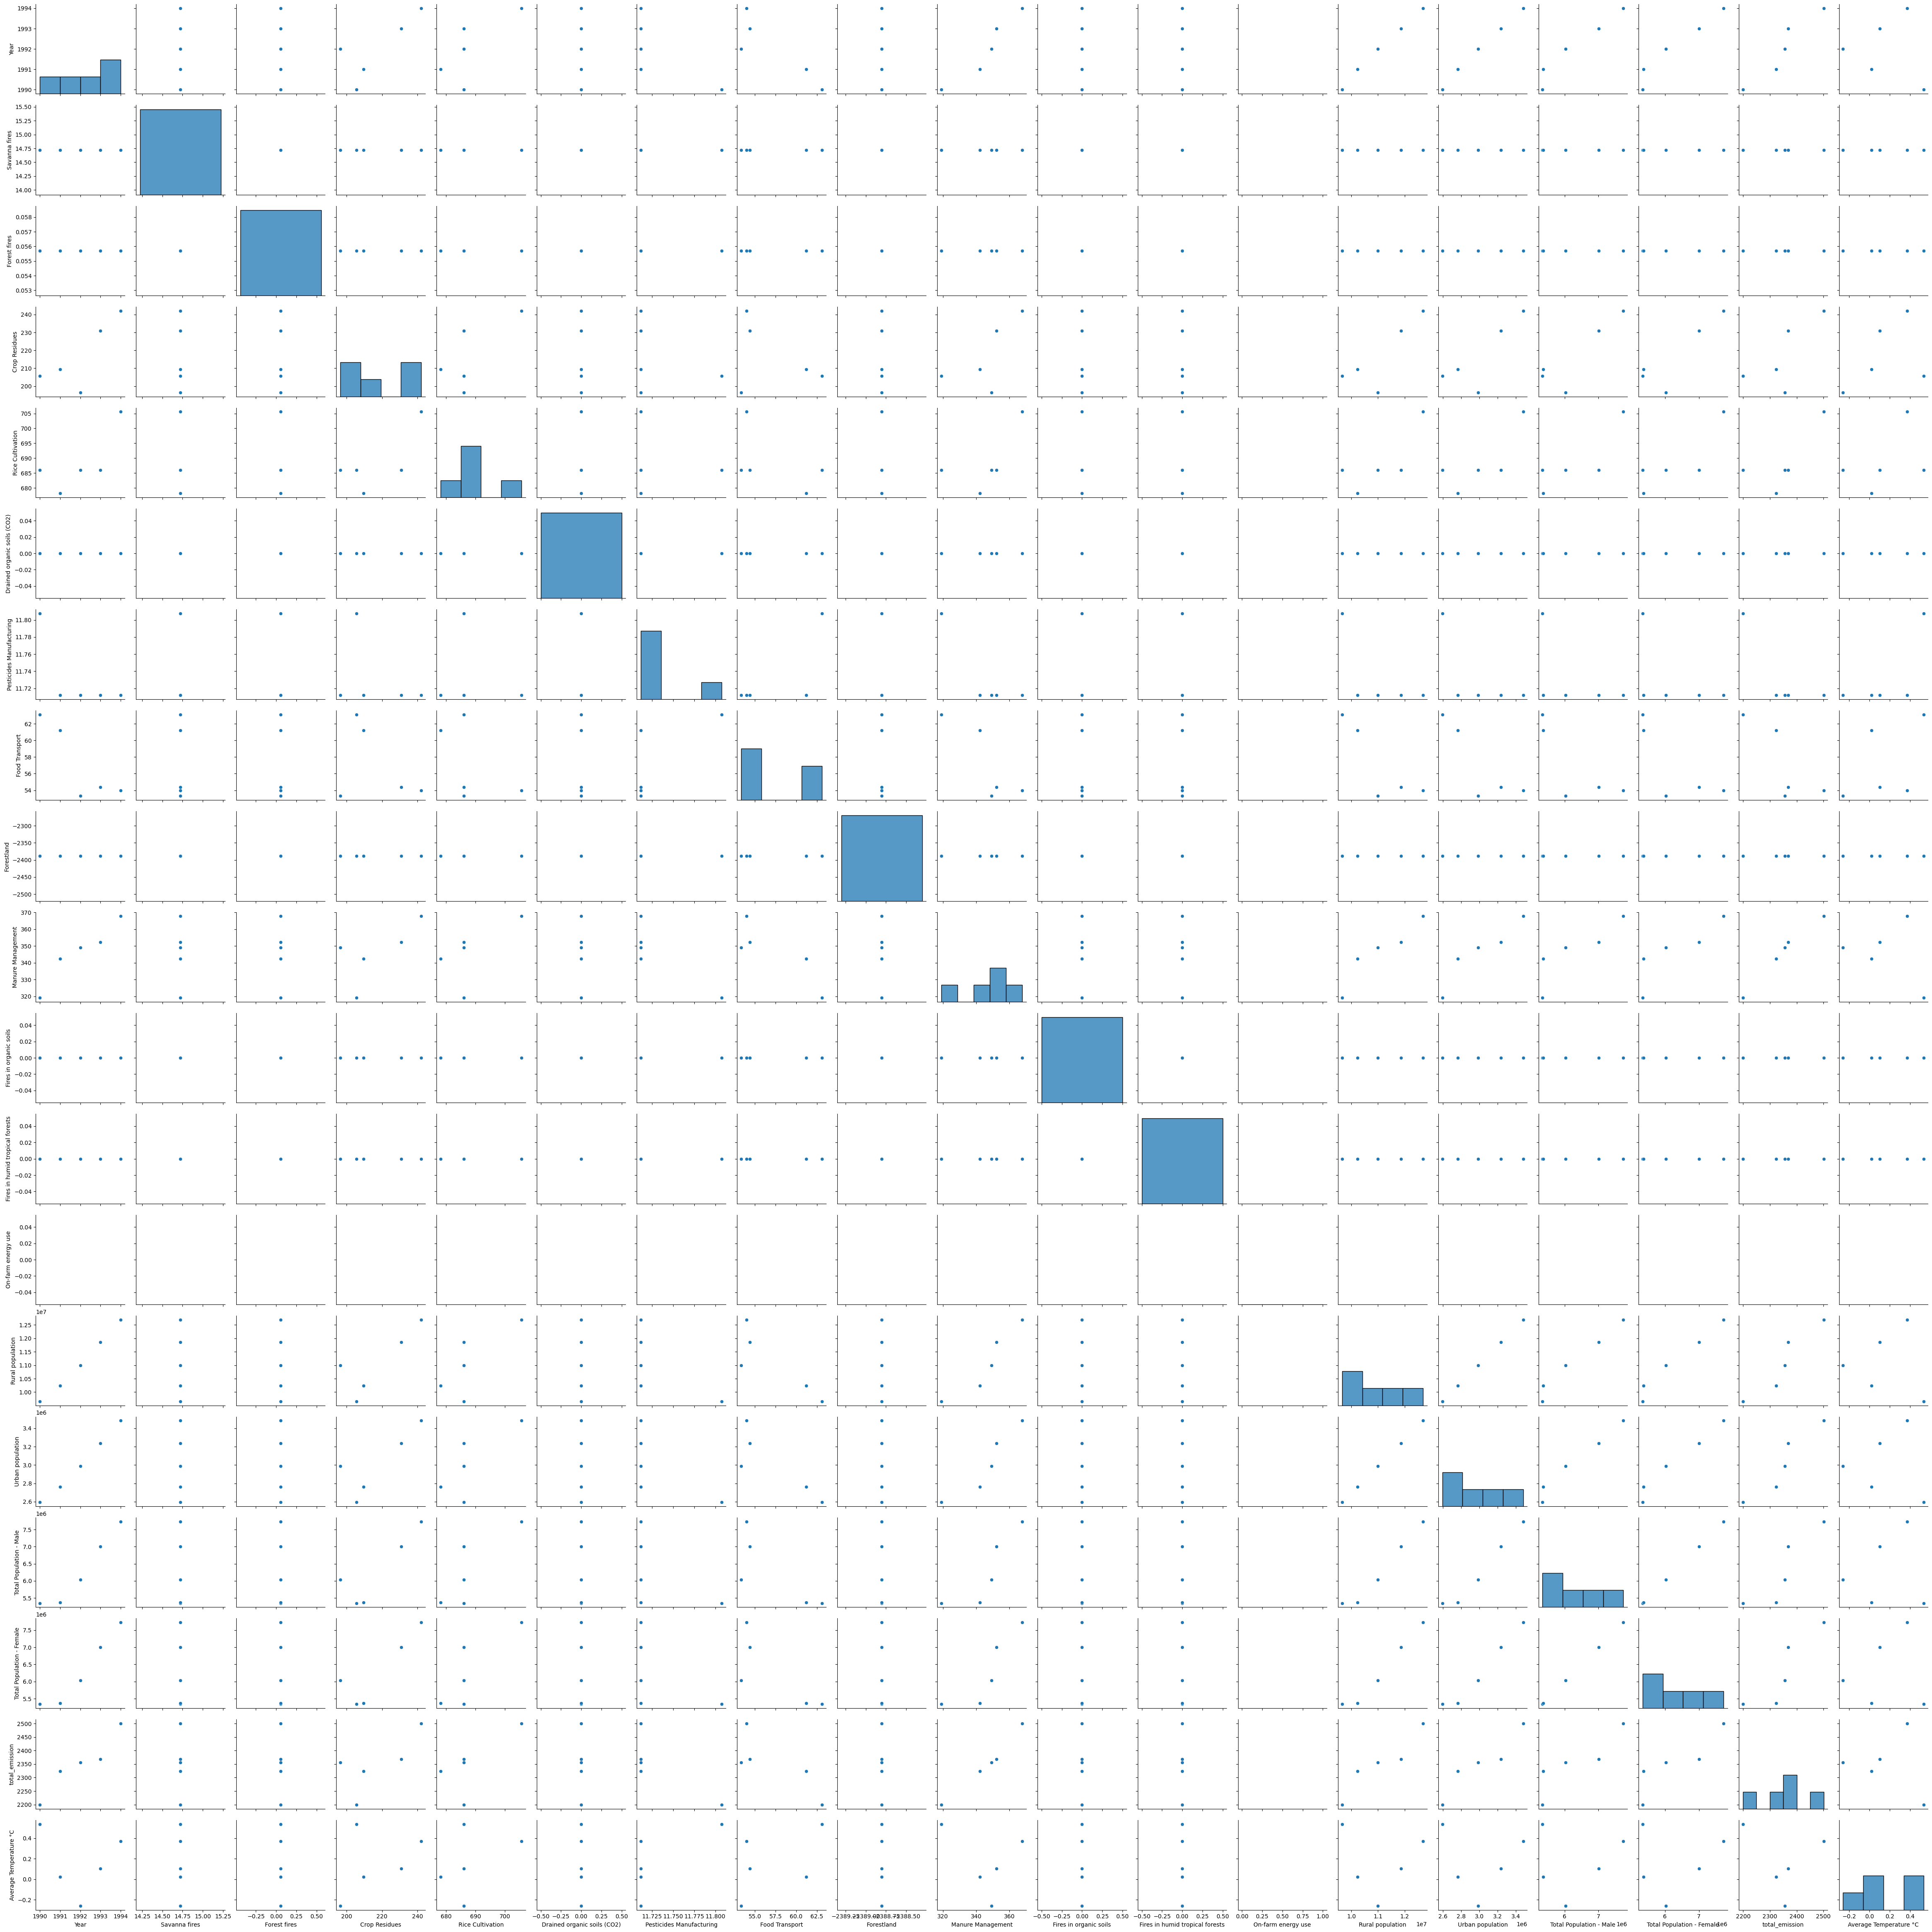

In [17]:
# Pairplot
sns.pairplot(data)
plt.show()

The pairplots indicate correllations between a number of variables particularly total_emission and variables relating to the food production like food processing, food transport, etc.
These correlations indicate that in areas where it is more industrialized total_emission is higher, e.g. when food processing increases then so does emission showing a positive correlation.

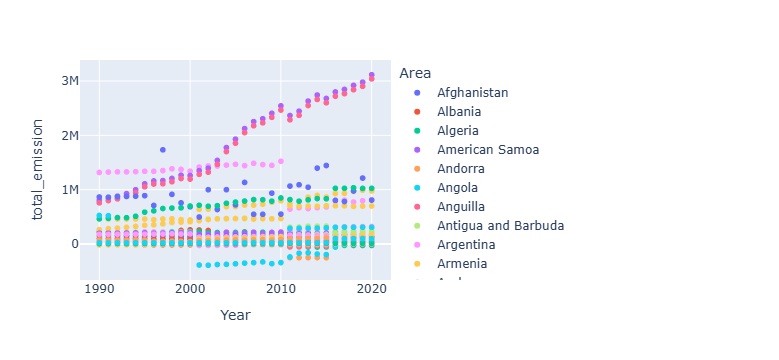

In [48]:
# Import Plotly Express
import plotly.express as px

# Load the data
data = pd.read_csv('co2_emissions_from_agri.csv')

# Scatter plot
fig = px.scatter(data, x='Year', y='total_emission', color='Area')
fig.show()


The scatter plot shows the relationship between total_emission and year where as the years progress the total emission increases in areas where the total_population is higher. This could be indicative of developments within the areas where production is increasing.

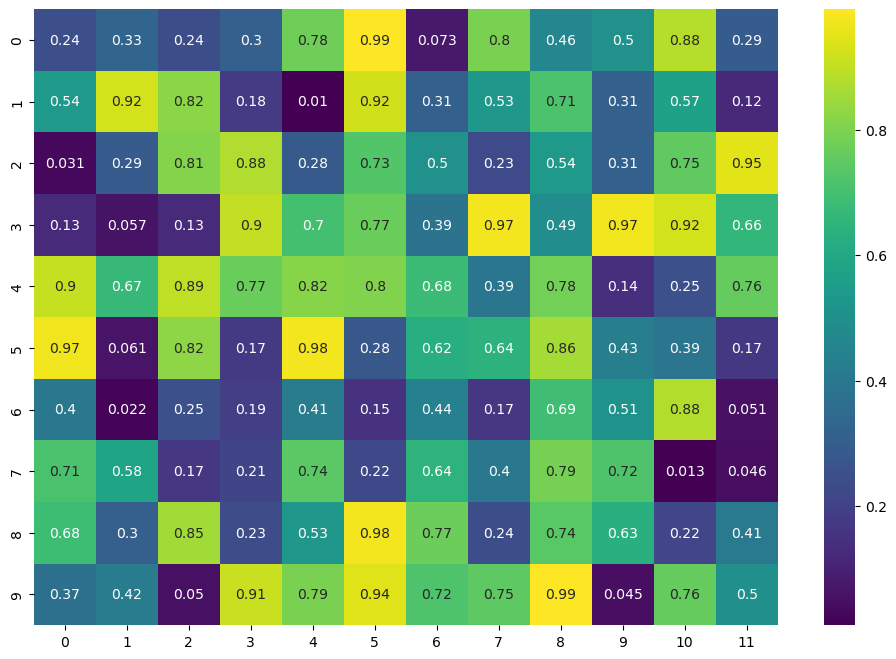

In [19]:
# Load the data
data = pd.read_csv('cleaned_co2_emissions.csv')

# Generate some data
data = np.random.rand(10, 12)

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
sns.heatmap(data, annot=True, cmap='viridis')

# Display the heatmap
plt.show()


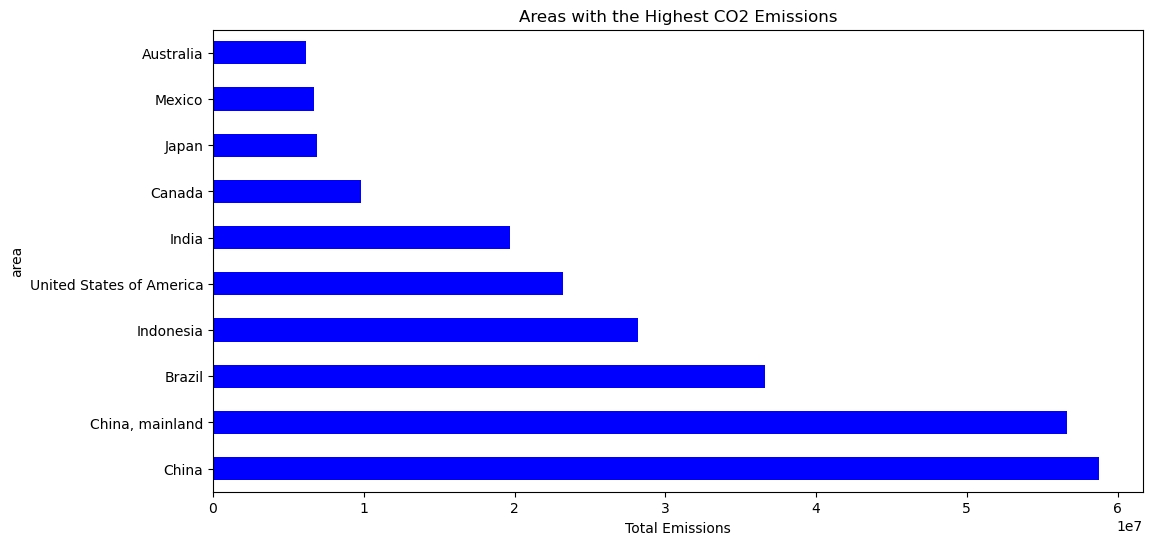

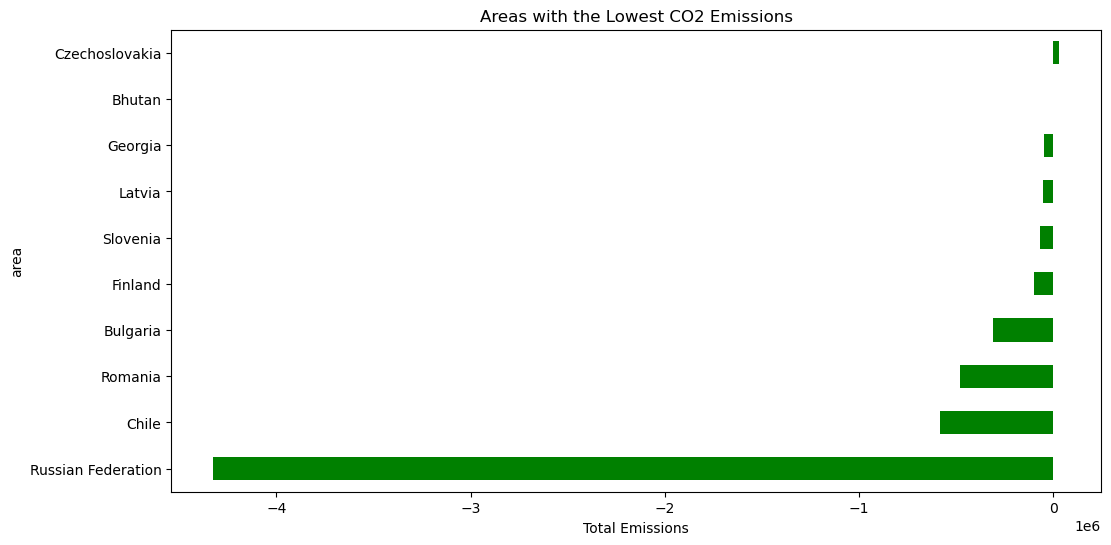

In [19]:
# Load the data
data = pd.read_csv('cleaned_co2_emissions.csv')

# Group the data by 'Area' and calculate the total emissions for each area
total_emissions_by_area = data.groupby('area')['total_emission'].sum()

# Get the top 10 and bottom 10 areas with the highest and lowest emissions
top10_emissions_areas = total_emissions_by_area.nlargest(10)
bottom10_emissions_areas = total_emissions_by_area.nsmallest(10)

# Plot the top 10 areas with the highest emissions as a horizontal bar graph
plt.figure(figsize=(12, 6))
top10_emissions_areas.plot(kind='barh', color='blue')
plt.title('Areas with the Highest CO2 Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('area')
plt.show()

# Plot the bottom 10 areas with the lowest emissions as a horizontal bar graph
plt.figure(figsize=(12, 6))
bottom10_emissions_areas.plot(kind='barh', color='green')
plt.title('Areas with the Lowest CO2 Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('area')
plt.show()

Areas with higher urban population numbers generally have higher CO2 emissions this can be attributted to the increase in the need for food production.

## Feature Engineering

Initial data:
      area  year  savanna fires  forest fires  crop residues  \
0  Albania  1990         5.5561        7.0253        59.2391   
1  Albania  1991         5.5561        7.0253        31.4625   
2  Albania  1992         5.5561        7.0253        29.9373   
3  Albania  1993         5.5561        7.0253        44.0550   
4  Albania  1994         5.5561        7.0253        42.4253   

   rice cultivation  drained organic soils (co2)  pesticides manufacturing  \
0           23.5200                     110.5705                       2.0   
1            6.2720                     110.5705                       2.0   
2            1.8816                     110.5705                       2.0   
3            1.0976                     110.5705                       2.0   
4            0.0000                     110.5705                       3.0   

   food transport  forestland  ...  manure management  fires in organic soils  \
0         46.9645     72.8581  ...           474.69

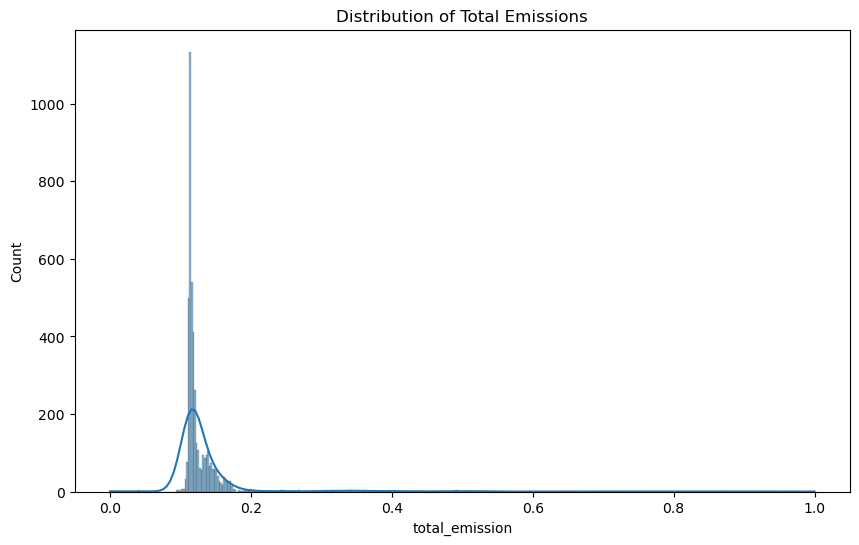

In [49]:
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('cleaned_co2_emissions.csv')

# Display the initial data
print("Initial data:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Fill missing values with the mean of the numeric columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# One-hot encode the 'Area' column
encoder = OneHotEncoder(sparse_output=False)
area_encoded = encoder.fit_transform(df[['area']])
area_encoded_df = pd.DataFrame(area_encoded, columns=encoder.get_feature_names_out(['area']))

# Combine the encoded 'Area' column with the rest of the dataframe
df = pd.concat([df.drop('area', axis=1), area_encoded_df], axis=1)

# Normalize the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows of the normalized dataframe
print("\nNormalized data:")
print(df.head())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['total_emission'], kde=True)
plt.title('Distribution of Total Emissions')
plt.show()

This code is a comprehensive data preprocessing, including handling missing values, encoding categorical variables, normalizing numeric data, and visualizing the distribution of a specific column.

## Model Development

##### 1. Linear Regression Testing

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming data is your DataFrame
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_encoded)

# Convert the imputed data back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data_encoded.columns)

# Define features and target variable
X = data_imputed.drop(columns=['total_emission'])
y = data_imputed['total_emission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 125919.21033475755
R-squared: 0.9999981796625802


The results of your regression model evaluation indicate the following:

High R² Value: The R² value being very close to 1 indicates that the model fits the data extremely well and explains almost all the variability in the target variable.
MSE Value: While the MSE is relatively high, the very high R² suggests that the model's predictions are very accurate. The MSE value should be interpreted in the context of the scale of your target variable. If total_emission values are large, an MSE of 125,919 might be acceptable..

##### 2. Cross-Validation Testing

In [51]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming data is your DataFrame
# Separate features and target variable
X = data.drop(columns=['total_emission'])
y = data['total_emission']

# Define a preprocessing pipeline for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and the regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean Squared Error (cross-validated): {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")


Mean Squared Error (cross-validated): 364466153.01268625
Standard Deviation of MSE: 595883836.8055629


In [52]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming data is your DataFrame
# Separate features and target variable
X = data.drop(columns=['total_emission'])
y = data['total_emission']

# Define a preprocessing pipeline for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and the regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define the K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean Squared Error (cross-validated): {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")


Mean Squared Error (cross-validated): 44822329.39101496
Standard Deviation of MSE: 2617200.0890397513


The output of your K-Fold cross-validation provides insights into the performance and stability of your regression model:

High MSE: The high mean MSE indicates that the model may not be performing well in predicting the target variable. This could be due to several factors, such as the complexity of the data, the presence of outliers, or the need for a more sophisticated model.
Moderate Variability: The standard deviation of the MSE suggests that the model's performance is somewhat consistent across different folds, but there is still some variability.


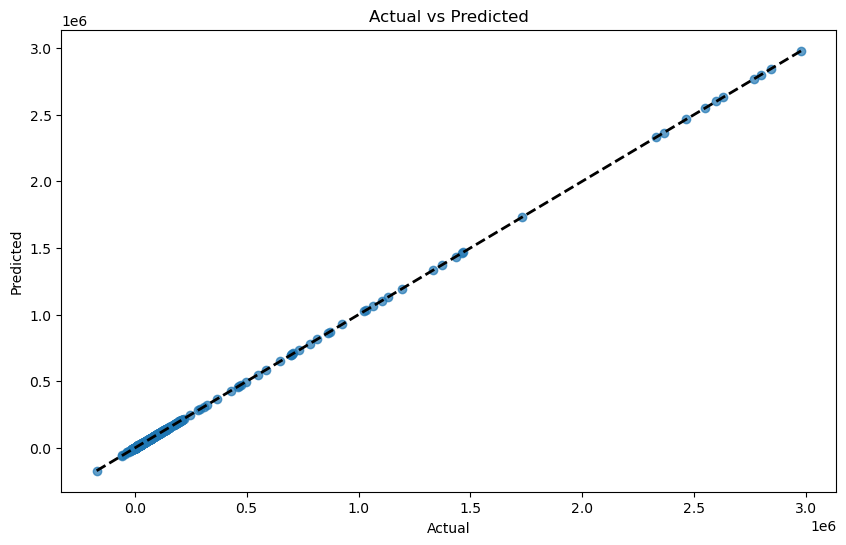

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test and y_pred are your actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Scatter Plot of Actual vs. Predicted Values
Purpose: To compare the actual values with the predicted values.
Interpretation:
Points close to the diagonal line indicate good predictions.
Points far from the line indicate errors.
A tight cluster around the line suggests a well-performing model.
If the points are randomly scattered around the line, it indicates that the model is capturing the underlying pattern well.

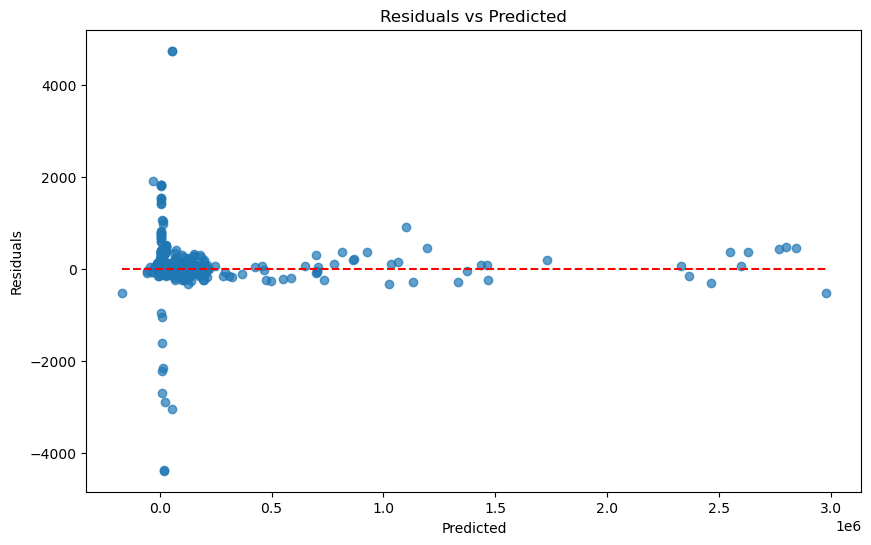

In [54]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

Residual Plot
Purpose: To visualize the residuals (errors) of the predictions.
Interpretation:
Residuals should be randomly distributed around zero.
A random pattern suggests that the model's assumptions are valid.
Patterns or trends in the residuals (e.g., a funnel shape) may indicate issues like heteroscedasticity or non-linearity.
Large residuals indicate points where the model's predictions are significantly off.

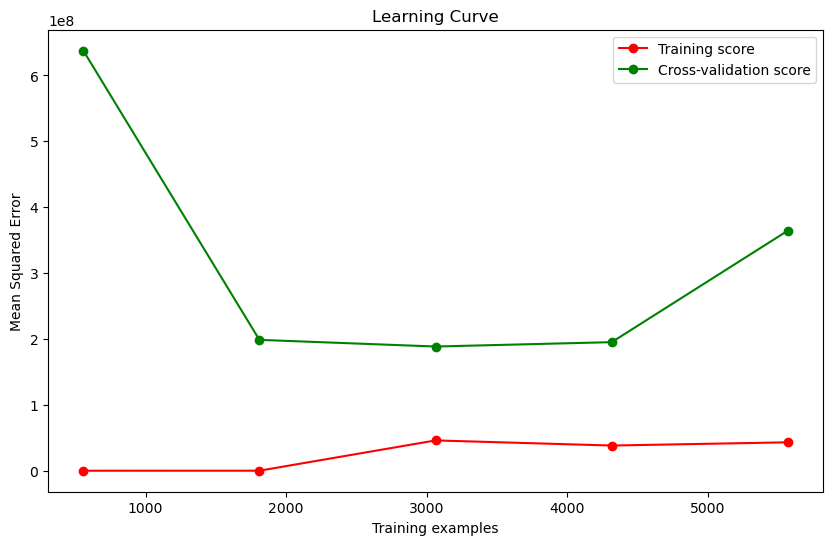

In [55]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

The above visualization is a leaning Curve
Purpose: To evaluate the model's performance as a function of the training set size.
Interpretation:
Training Score: The model's performance on the training data.
Validation Score: The model's performance on the validation data.
Overfitting: If the training score is high and the validation score is low, the model is overfitting.
Underfitting: If both the training and validation scores are low, the model is underfitting.
Good Fit: If both scores are high and close to each other, the model is well-fitted.

##### 3. Decision Tree Regression & Random Forest Regression

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming data is your DataFrame
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_encoded)

# Convert the imputed data back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data_encoded.columns)

# Define features and target variable
X = data_imputed.drop(columns=['total_emission'])
y = data_imputed['total_emission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print(f"Decision Tree - Mean Squared Error: {dt_mse}")
print(f"Decision Tree - R-squared: {dt_r2}")

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - R-squared: {rf_r2}")


Decision Tree - Mean Squared Error: 783725802.2135843
Decision Tree - R-squared: 0.9886701528634456
Random Forest - Mean Squared Error: 634854371.4054929
Random Forest - R-squared: 0.9908222965714769


Mean Squared Error (MSE):

This metric measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit of the model to the data.
For the Decision Tree, the MSE is 783,725,802.21.
For the Random Forest, the MSE is 634,854,371.41.
The Random Forest has a lower MSE, indicating it has a better fit to the data compared to the Decision Tree.

R-squared (R²):

This metric represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating a better fit.
For the Decision Tree, the R² is 0.9887.
For the Random Forest, the R² is 0.9908.
Both models have high R² values, indicating they explain a large portion of the variance in the target variable. The Random Forest has a slightly higher R², suggesting it performs better overall.
In summary, both models perform well, but the Random Forest model has a slight edge over the Decision Tree in terms of both MSE and R². This is expected as Random Forests are generally more robust and less prone to overfitting compared to single Decision Trees.

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming data is your DataFrame
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_encoded)

# Convert the imputed data back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data_encoded.columns)

# Define features and target variable
X = data_imputed.drop(columns=['total_emission'])
y = data_imputed['total_emission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Regressor model
svr_model = SVR()
# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_y_pred = svr_model.predict(X_test)

# Evaluate the model
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

print(f"Support Vector Regressor - Mean Squared Error: {svr_mse}")
print(f"Support Vector Regressor - R-squared: {svr_r2}")

Support Vector Regressor - Mean Squared Error: 57707111073.35517
Support Vector Regressor - R-squared: -0.05927127855679726


## Conclusion

In regards to the models created we have demonstrated the relationships between the variables and how one variables impacts another.
When reviewing the C02 emissions data it is clear to us that in order to make informed predictions we have to consider variables that have a strong correllation, in doing so we have established that strong correlations exist between the following variables:
 - with total_emission(y)
 - (x) variables could be
     - urban_population
     - food_household_consumption
     - IPPU
     - food_packaging
When analysing the data it also clear that in areas where food production has a higher demand due the urban population size, this impacts the CO2 emissions e.g. higher population = higher emissions.

The evaluation compares regression models:
• Linear Regression has a very high R² of 0.999998, meaning it explains almost all variance, but its high Mean Squared Error (MSE) indicates some prediction error. When validated with K-Fold, it shows a much higher MSE, suggesting possible overfitting.
• Decision Tree shows an MSE of ~783 million and R² of 0.9887.
• Random Forest performs best with a lower MSE of ~634 million and higher R² of 0.9908, indicating more accurate and robust results due to its ensemble nature.
Overall Random Forest is the best model overall due to its balance between accuracy and generalization.